<a href="https://colab.research.google.com/github/acorreia61201/SAOPythonPrimer/blob/main/solutions/Solutions9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SAO/LIP Python Primer Course Exercise Set 9

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/acorreia61201/SAOPythonPrimer/blob/main/exercises/Exercises9.ipynb)

## Exercise 1: Basic Error Handling

Let's see some simple use cases for `try`/`except` statements.

Download the data below:

In [ ]:
!wget https://raw.githubusercontent.com/acorreia61201/SAOPythonPrimer/main/files/randnums.csv

--2023-06-12 23:50:03--  https://raw.githubusercontent.com/acorreia61201/SAOPythonPrimer/main/files/randnums.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2138 (2.1K) [text/plain]
Saving to: ‘randnums.csv’

randnums.csv        100%[===================>]   2.09K  --.-KB/s    in 0s      

2023-06-12 23:50:03 (34.5 MB/s) - ‘randnums.csv’ saved [2138/2138]



This dataset contains only one column: a series of 200 random numbers. We'll do a simple analysis of the parity of the numbers in this dataset.

**Your task:** Load the data. Iterate over the data and populate a dictionary with entries `number: parity`, where `number` is the number from the dataset and `parity` is either the string 'even' if the number is even or 'odd' if the number is odd. Print some entries in your dictionary to see if it worked.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('randnums.csv') # read in the data
df # see what the number column is

,Unnamed: 0,vals
0,0,533.000000
1,1,376.000000
2,2,253.000000
3,3,387.000000
4,4,661.513989
...,...,...
195,195,927.000000
196,196,197.000000
197,197,587.000000
198,198,333.000000


In [ ]:
# call in the column vals and iterate over it
vals = df['vals']
parity = {} # empty dictionary

for num in vals:
    if num % 2 == 0:
        parity[num] = 'even' # the number is even
    else:
        parity[num] = 'odd' # the number is odd

parity # let's print to check; we should see floats with value 'odd'

{533.0: 'odd',
 376.0: 'even',
 253.0: 'odd',
 387.0: 'odd',
 661.5139894910433: 'odd',
 570.4193365434093: 'odd',
 867.0: 'odd',
 577.0: 'odd',
 52.0: 'even',
 467.0: 'odd',
 328.0: 'even',
 149.0: 'odd',
 709.0: 'odd',
 932.0: 'even',
 531.0: 'odd',
 578.0: 'even',
 204.0: 'even',
 395.0: 'odd',
 5.0: 'odd',
 1.0: 'odd',
 218.0: 'even',
 431.08640307526736: 'odd',
 737.0: 'odd',
 887.0: 'odd',
 223.5127441172723: 'odd',
 843.0: 'odd',
 564.0: 'even',
 27.0: 'odd',
 502.0: 'even',
 685.0: 'odd',
 123.0: 'odd',
 799.0: 'odd',
 833.0: 'odd',
 549.0: 'odd',
 263.0: 'odd',
 978.0: 'even',
 113.0: 'odd',
 454.0: 'even',
 882.0: 'even',
 633.0: 'odd',
 356.0: 'even',
 347.9269298683116: 'odd',
 91.0: 'odd',
 188.71423109449324: 'odd',
 652.0: 'even',
 991.0: 'odd',
 888.0: 'even',
 396.0: 'even',
 670.0: 'even',
 314.0: 'even',
 745.0: 'odd',
 845.0: 'odd',
 883.0: 'odd',
 687.0: 'odd',
 880.0: 'even',
 246.0: 'even',
 78.22956392603042: 'odd',
 257.0: 'odd',
 335.0: 'odd',
 679.0: 'odd',
 

Oh no...there's a bunch of decimals sprinkled throughout the data. As you may recall, numbers with non-trivial decimals don't have a well-defined parity. The data set is a bit too big to sift through every single value and pick out the decimals by index, so we'll use an assertion instead.

**Your task:** Write a function that checks for parity in the same way as you did above, adding a line which asserts that each value is an integer (Hint: Recall that integers return the same `math.ceil()` and `math.floor()` values). Now, use your function to iterate over the data and populate a dictionary. Add a `try`/`except` block that catches the assertion error and enters 'decimal' wherever the key is a decimal.

In [ ]:
def par(x):
    '''
    This function will determine the parity of the input.
    It returns 'even' if it gets an even integer and 'odd' if it receives an odd integer
    '''
    # throw an error if the input isn't an integer
    assert np.ceil(x) == np.floor(x), 'Input is not an integer'
    # then check the parity
    if x % 2 == 0:
        return 'even' # the number is even
    else:
        return 'odd' # the number is odd

parity = {} # empty dictionary
for i in vals:
    try:
        parity[i] = par(i) # try appending the val and parity to the list using the above function
    except AssertionError: # catch the error that comes from inputting a decimal
        parity[i] = 'decimal' # manually put in the value

parity # check the result

{533.0: 'odd',
 376.0: 'even',
 253.0: 'odd',
 387.0: 'odd',
 661.5139894910433: 'decimal',
 570.4193365434093: 'decimal',
 867.0: 'odd',
 577.0: 'odd',
 52.0: 'even',
 467.0: 'odd',
 328.0: 'even',
 149.0: 'odd',
 709.0: 'odd',
 932.0: 'even',
 531.0: 'odd',
 578.0: 'even',
 204.0: 'even',
 395.0: 'odd',
 5.0: 'odd',
 1.0: 'odd',
 218.0: 'even',
 431.08640307526736: 'decimal',
 737.0: 'odd',
 887.0: 'odd',
 223.5127441172723: 'decimal',
 843.0: 'odd',
 564.0: 'even',
 27.0: 'odd',
 502.0: 'even',
 685.0: 'odd',
 123.0: 'odd',
 799.0: 'odd',
 833.0: 'odd',
 549.0: 'odd',
 263.0: 'odd',
 978.0: 'even',
 113.0: 'odd',
 454.0: 'even',
 882.0: 'even',
 633.0: 'odd',
 356.0: 'even',
 347.9269298683116: 'decimal',
 91.0: 'odd',
 188.71423109449324: 'decimal',
 652.0: 'even',
 991.0: 'odd',
 888.0: 'even',
 396.0: 'even',
 670.0: 'even',
 314.0: 'even',
 745.0: 'odd',
 845.0: 'odd',
 883.0: 'odd',
 687.0: 'odd',
 880.0: 'even',
 246.0: 'even',
 78.22956392603042: 'decimal',
 257.0: 'odd',
 33

## Exercise 2: Series Approximations, revisited

Let's see how we can use `try`/`except` and `assert` statements when doing a practical problem. We can make the following approximation:

\begin{equation}
\frac{x}{(1-x)^2} = \sum_{n=0}^{\infty} nx^n
\end{equation}

**Your task:** Write a function that calculates the series approximation for the expression above up to $n$ terms.

In [ ]:
def series(x, n):
    ser = 0 # placeholder
    for i in range(n): # iterate from 0 to n-1 for n terms
        ser += i*x**i # add term
    return ser

**Your task:** Generate series approximations for $n=[2, 4, 8, 16]$ terms over the domain $x = [-2, 2]$. Plot the results versus $x$ on one plot along with the exact function. Make the exact function solid black, and label each of the series approximations and axes accordingly. Scale the y-axis to $[-1, 10]$ so you can see the lines better.

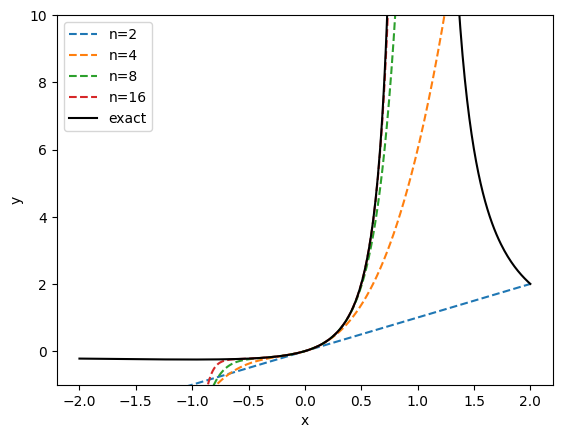

In [ ]:
import matplotlib.pyplot as plt

n = [2, 4, 8, 16] # n values
x = np.linspace(-2, 2, 400) # x values to evaluate series over

# iterate over n values
for i in n:
    approx = series(x, i) # evaluate with i = n terms
    plt.plot(x, approx, linestyle='dashed', label=f'n={i}')

# plot the exact solution
plt.plot(x, x/(1-x)**2, color='black', label='exact')
plt.ylim(-1, 10)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Looking at the plot, you may notice that the function doesn't converge at all beyond the asymptote at $x=1$. In fact by examining the series, you may be wondering how the series could emulate the left and right sides of the plot at all. The simple answer is that it doesn't. The series approximation is only valid for $|x| < 1$, excluding the bounds to avoid asymptotes.

**Your task:** Modify your function above to assert that the input value of `x` is within the valid range for the series approximation. Try to redo the analysis above; you should get an error immediately.

In [ ]:
def series(x, n):
    # assert x is in domain
    assert abs(x) < 1, 'x is not in valid domain'
    # then carry out the analysis
    ser = 0 # placeholder
    for i in range(n): # iterate from 0 to n-1 for n terms
        ser += i*x**i # add term
    return ser

# we'll restructure the loop here; abs() doesn't work with arrays anyways

for i in n: # iterate over n values
    approx = [] # placeholder array for x values given current n value
    for j in x: # at current n value, evaluate at each x value
        approx.append(series(j, i)) # evaluate with i = n terms at x = j
    plt.plot(x, approx, linestyle='dashed', label=f'n={i}') # plot once we have all the x values

AssertionError: ignored

**Your task:** To recreate the previous analysis, write a loop that iterates over the domain $[-2, 2]$ as well as $n=[2, 4, 8, 16]$. Write a `try`/`except` block that handles the assertion errors you'll get. If the function throws an error at an $x$ value, set the corresponding estimate value to `numpy.nan` or `None`. Plot the results as you did before.

(Hint: This will be a double-nested loop, where we iterate over the x values within each n value. We'll want to do the error processing while iterating over x, and we only want to plot the result for a given n value once we're done iterating over x.)

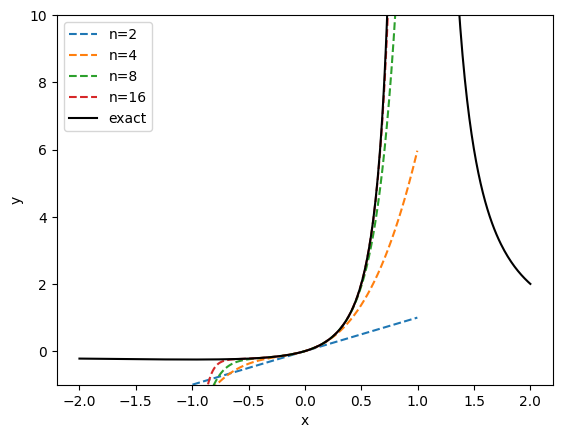

In [ ]:
for i in n: # iterate over n values
    approx = [] # placeholder array for x values given current n value
    for j in x: # at given n value, iterate over each x value
        try:
            approx.append(series(j, i)) # evaluate with i = n terms at x = j
        except AssertionError: # catch the error for abs(x) > 1
            approx.append(None) # None will be a placeholder when we plot later
    plt.plot(x, approx, linestyle='dashed', label=f'n={i}') # plot once we have all the x values

# plot the exact solution
plt.plot(x, x/(1-x)**2, color='black', label='exact')
plt.ylim(-1, 10)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

## Exercise 3: Simple Debugging

**Your task:** Each of the functions below has a bug. That is, they should output results, just not the correct ones. I've provided a description as to what each function should do; it's up to you to find the bug in each function and correct it. Use the cells to do whatever debugging you need.

In [ ]:
# bug: the distance formula is sqrt((x1-x0)**2 - (y1-y0)**2); there was a plus in ydist
# a good way to check this would be to try points you know the distance between, like (0, 1) and (0, 2) (dist = 1) or (1, 1) and (4, 5) (dist = 5)

def distance(x, y):
    '''
    Compute the straight-line distance between two points x and y.

    x, y: tuples representing ordered pairs
    '''
    xdist = x[0]-y[0]
    ydist = x[1]-y[1]
    return (xdist*xdist + ydist*ydist)**0.5

In [ ]:
# bug: the equation of motion is x = x0 + v0*t + 0.5*a*t*t. The last term had a**2 rather than t**2
# a good way to check this would be to try plotting a simple problem, like dropping a ball off a building.
# the shape of the curve should be a parabola, whereas this would produce a line

def freefall(t, a, x0=0, v0=0):
    '''
    Compute the position of an object subject to constant acceleration at a given time

    t: time in seconds
    a: acceleration in m/s**2
    x0: initial position in meters. Default 0
    v0: initial velocity in m/s. Default 0 (start at rest)
    '''
    pos_term = x0
    vel_term = v0*t
    acc_term = 0.5*a*t*t
    return pos_term + vel_term + acc_term

In [ ]:
# bug: both tuples output the incorrect converted values
# you can try solving the conversion from point-slope to standard form manually to see what the result should be:
# y = mx + b -> Ax + By = C means (A, B, C) = (m, -1, -b)
# Ax + By = C -> y = mx + b means (m, b) = (-A/B, C/B)
# re-deriving a result from simpler formulas is usually a good way to debug and ensures you know what your code should be doing.
# you could also try converting some equations manually and seeing if the function outputs the same thing

def convert_line(vals):
    '''
    Convert between slope-intercept and standard form of a linear equation.

    vals: tuple of values. (m, b) if input is slope-intercept form; (A, B, C) if input is standard form.
    '''
    if len(vals) == 2:
        m, b = vals
        out_vals = (m, -1, -b)
    elif len(vals) == 3:
        A, B, C = vals
        out_vals = (-A/B, C/B)
    else:
        print('Input must be length 2 for slope-intercept form or length 3 for standard form')
        return
    return out_vals

In [ ]:
# bug: the terms in the for loop are not multiplied by 2
# as stated in a previous exercise, a good way to test is to put in a simple function like x**2 or exp(x) and see what you get out
# you can also make n small and try evaluating manually with the trapezoidal rule formula

# side note: the docstring says n gives number of trapezoids; it's actually number of points
# this isn't a bug, just a conceptual error on my part. The function will still converge to the correct result

import numpy as np

def trapezoidal(f, n, a, b):
    '''
    Compute a definite integral using the trapezoidal rule.

    f: function of the integrand
    n: number of trapezoids to integrate over
    a, b: lower and upper bounds of integration
    '''
    grid = np.linspace(a, b, n)
    dx = (b-a)/(n-1)
    integral = f(a) + f(b)
    for i in range(1, n-1):
        integral += 2*f(grid[i])
    return dx*integral/2

In [ ]:
# bug: the normal distribution isn't normalized properly; it should be divided by sqrt(2*np.pi)
# you can test this by using known values; inputting (-1, 1) for bounds should give ~0.68 as per the 68-95-99.7 rule

from scipy import integrate
import numpy as np

def bell(a, b):
    '''
    Compute the percentage of points that lie between two z-scores in a normalized Gaussian distribution.

    a, b: lower and upper bounds, aka z-scores
    '''
    norm_dist = lambda x: np.exp(-x*x/2)/np.sqrt(2*np.pi)
    area = integrate.quad(norm_dist, a, b)
    return area